<a href="https://colab.research.google.com/github/Zayed-Rahat/ML_Lab_university/blob/main/multivariate_linear_regression_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('property_listing_data_in_Bangladesh.csv')
data.head(10)

,title,beds,bath,area,adress,type,purpose,flooPlan,url,lastUpdated,price
0,Eminent Apartment Of 2200 Sq Ft Is Vacant For ...,3,4,"2,200 sqft","Block A, Bashundhara R-A, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/10...,https://www.bproperty.com/en/property/details-...,"August 13, 2022",50 Thousand
1,"Apartment Ready To Rent In South Khulshi, Near...",3,4,"1,400 sqft","South Khulshi, Khulshi, Chattogram",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/44...,https://www.bproperty.com/en/property/details-...,"January 25, 2022",30 Thousand
2,"Smartly priced 1950 SQ FT apartment, that you ...",3,4,"1,950 sqft","Block F, Bashundhara R-A, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/11...,https://www.bproperty.com/en/property/details-...,"February 22, 2023",30 Thousand
3,2000 Sq Ft Residential Apartment Is Up For Ren...,3,3,"2,000 sqft","Sector 9, Uttara, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/14...,https://www.bproperty.com/en/property/details-...,"October 28, 2021",35 Thousand
4,Strongly Structured This 1650 Sq. ft Apartment...,3,4,"1,650 sqft","Block I, Bashundhara R-A, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/10...,https://www.bproperty.com/en/property/details-...,"February 19, 2023",25 Thousand
5,"A nice residential flat of 3400 SQ FT, for ren...",5,5,"3,400 sqft","Gulshan 1, Gulshan, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/15...,https://www.bproperty.com/en/property/details-...,"February 14, 2023",1.1 Lakh
6,1600 Square Feet Apartment With Amazing Rooms ...,3,3,"1,600 sqft","Sector 6, Uttara, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/15...,https://www.bproperty.com/en/property/details-...,"August 6, 2022",35 Thousand
7,Let Us Help You To Rent This 1250 Sq Ft Apartm...,3,3,"1,250 sqft","Block K, Bashundhara R-A, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/15...,https://www.bproperty.com/en/property/details-...,"January 4, 2023",23 Thousand
8,An Extensive Apartment Of 2150 Sq Ft Is Vacant...,3,4,"2,150 sqft","Sector 10, Uttara, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/15...,https://www.bproperty.com/en/property/details-...,"June 28, 2022",40 Thousand
9,A well-constructed 1250 SQ FT apartment is rea...,3,3,"1,250 sqft","Block K, Bashundhara R-A, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/15...,https://www.bproperty.com/en/property/details-...,"January 4, 2023",23 Thousand


In [ ]:
data.shape

(7557, 11)

In [ ]:
np.unique(data['type'])

array(['Apartment', 'Building', 'Duplex'], dtype=object)

**Remove all the Duplex and Building Type properties from the dataset**

In [ ]:
df = data[data['type'] == 'Apartment']
df['type'].unique()

array(['Apartment'], dtype=object)

**Remove all non-numeric data columns**

In [ ]:
df.drop(["title","adress","type","purpose","flooPlan","url","lastUpdated"],axis = 1, inplace = True)
df.head()

<ipython-input-41-47d2d98333e1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(["title","adress","type","purpose","flooPlan","url","lastUpdated"],axis = 1, inplace = True)


,beds,bath,area,price
0,3,4,"2,200 sqft",50 Thousand
1,3,4,"1,400 sqft",30 Thousand
2,3,4,"1,950 sqft",30 Thousand
3,3,3,"2,000 sqft",35 Thousand
4,3,4,"1,650 sqft",25 Thousand


**Apply necessary data cleaning on the remaining columns to convert non-standard data entries to standard entries**

In [ ]:
print(df['beds'].unique())
print(df['bath'].unique())

['3 ' '5 ' '4 ' '1 Bed' '2 ' '6 ']
['4 ' '3 ' '5 ' '2 ' '1 Bath' '6 ']


In [ ]:
def col_clean(x):
    x = x.split()[0]
    return int(x)

df['beds'] = df['beds'].apply(col_clean)
df['bath'] = df['bath'].apply(col_clean)

def clean_area(x):
    x = x.split()[0]
    x = x.replace(",", '')
    return int(x)

df["area"] = df["area"].apply(clean_area)
df.head()

<ipython-input-43-5953d87f4307>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['beds'] = df['beds'].apply(col_clean)
<ipython-input-43-5953d87f4307>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bath'] = df['bath'].apply(col_clean)
<ipython-input-43-5953d87f4307>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

,beds,bath,area,price
0,3,4,2200,50 Thousand
1,3,4,1400,30 Thousand
2,3,4,1950,30 Thousand
3,3,3,2000,35 Thousand
4,3,4,1650,25 Thousand


In [ ]:
def clean_price(x):
    t = x.split()
    temp = float(t[0])
    if t[1] == "Thousand":
        t = temp * 1000
    else:
        t = temp * 100000
    return t

df["price"] = df["price"].apply(clean_price)
df.head()

<ipython-input-44-619e948ae334>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["price"] = df["price"].apply(clean_price)


,beds,bath,area,price
0,3,4,2200,50000.0
1,3,4,1400,30000.0
2,3,4,1950,30000.0
3,3,3,2000,35000.0
4,3,4,1650,25000.0


In [ ]:
df = df.astype(float)
df.dtypes

beds     float64
bath     float64
area     float64
price    float64
dtype: object

**Apply data normalization techniques to each column to scale the numeric data.**

In [ ]:
df = (df - df.min()) / (df.max() - df.min())
df.head()

,beds,bath,area,price
0,0.4,0.6,0.283582,0.048449
1,0.4,0.6,0.164179,0.026674
2,0.4,0.6,0.246269,0.026674
3,0.4,0.4,0.253731,0.032118
4,0.4,0.6,0.201493,0.021230


**Train-Test-Validation**

In [ ]:
y = df['price']
X = df.drop(['price'], axis = 1)
print(X.shape)
print(y.shape)

(7489, 3)
(7489,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=42)
X_valid,X_test,y_valid,y_test=train_test_split(X_test,y_test,test_size=0.5,random_state=42)

train_size = len(X_train)
val_size = len(X_valid)
test_size = len(X_test)
(train_size, len(y_train)), (val_size, len(y_valid)), (test_size, len(y_test))

((4493, 4493), (1498, 1498), (1498, 1498))

**Cost function**

In [ ]:
def cost_func(x, y, w, b):
    m=len(y)
    return (1/(2*m))*np.sum(((x.dot(w)+b)-y)**2)

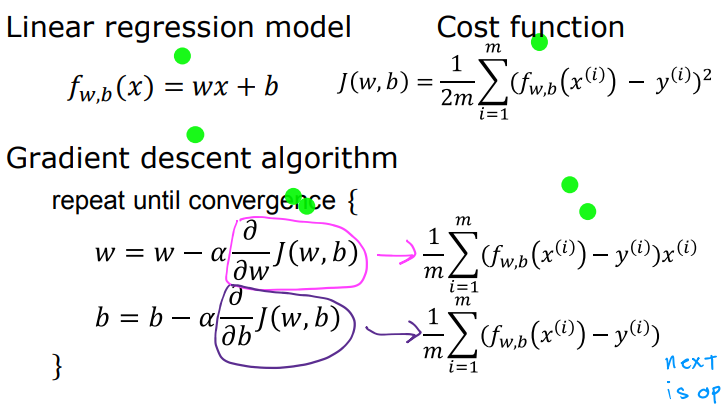

In [ ]:
def gradient_descent(X, Y, x, y, w, lr, epochs, bias ):
    m = len(Y)
    b=bias

    for i in range(epochs):
        error = X.dot(w) - Y
        grad = (1/m) * X.transpose().dot(error)

        w -= (lr*grad)
        b -= lr*(1/m * np.sum(error))

        loss = cost_func(X, Y, w , b)

        val_loss = cost_func(x, y, w, b)
        print("Epoch",i+1, " Training Loss: ", loss," Validation Loss:", val_loss)
    return w

In [ ]:
# Initialize weights
w = np.zeros(X_train.shape[1])

#Hyperparameters
lr = 0.11
epochs = 500
bias=0.0
model= gradient_descent(X_train, y_train, X_valid, y_valid, w, lr, epochs, bias)

Epoch 1  Training Loss:  0.0013517127766909307  Validation Loss: 0.0012452950354989297
Epoch 2  Training Loss:  0.0012574862844073446  Validation Loss: 0.0011514217447447248
Epoch 3  Training Loss:  0.0011812287327042663  Validation Loss: 0.001075527413092904
Epoch 4  Training Loss:  0.0011212578714891136  Validation Loss: 0.0010159278794535432
Epoch 5  Training Loss:  0.0010760182042122194  Validation Loss: 0.0009710659017293811
Epoch 6  Training Loss:  0.0010440722390464231  Validation Loss: 0.0009395023959941452
Epoch 7  Training Loss:  0.0010240923196295664  Validation Loss: 0.0009199082560458691
Epoch 8  Training Loss:  0.0010148529977719602  Validation Loss: 0.0009110567156840604
Epoch 9  Training Loss:  0.0010152239129430905  Validation Loss: 0.0009118162184752181
Epoch 10  Training Loss:  0.0010241631456102136  Validation Loss: 0.0009211437620327842
Epoch 11  Training Loss:  0.0010407110136157886  Validation Loss: 0.0009380786859549241
Epoch 12  Training Loss:  0.00106398428276

In [ ]:
test_loss = cost_func(X_test, y_test, model,bias)
print(f"Test Loss = {test_loss}")

Test Loss = 0.0007658614263640453
